Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 00: Preparation

## Introduction

This is the first exercise sheet. It is intended to help making yourself familiar with the tools we will use in the Machine Learning Practices. If you can read this text, you have already managed the first step: Starting the jupyter notebook server and opening a notebook in your browser.

The homework sheets will usually be available at the beginning of the week and are supposed to be solved in groups of three. They have to be handed in before Sunday evening. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups` of the Machine Learning Practice; Enrollment open from Tuesday, April 28, after the first practice session). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest the newest version of Python 3 and installing the conda environment as explained in the practice session and in the file "ml-install.txt" (found on Stud.IP in the "Documents" section in the Folder "Exercises".

You can solve this sheet alone or if you formed already a group in a group. You do not have to upload your solution to Stud.IP.

Procedure for all following sheets: Upload your results to your group's Stud.IP folder. 

In case you cannot do this first sheet (due to technical or organizational problems) please prepare a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and in the first practice session

## Goal of this Sheet

In this sheet you shall familiarize with different machine learning python modules, we will later use. Moreover, you will learn how to open datasets and how to visualize data.

## Assignment 0: Check your installation [0 Points]
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [1]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('imageio') is not None , 'imageio not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

### Remarks:

* If you experience any troubles, ask your fellow students or send us an e-mail - we are always happy to help.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: The Old Faithful Dataset [10 Points]

The [Old Faithful Geyser Data](http://www.stat.cmu.edu/%7Elarry/all-of-statistics/=data/faithful.dat) is a classical toy dataset in machine learning. It describes the eruption behaviour of the Old Faithful Geyser
in the Yellowstone National Park (for the curious ones: there are several [webcams](https://www.nps.gov/yell/learn/photosmultimedia/webcams.htm#onthisPage-0) filming the geyser, allowing you to extend the dataset ;-).

**a)** Open the [Old Faithful Geyser Data](http://www.stat.cmu.edu/%7Elarry/all-of-statistics/=data/faithful.dat) and briefly describe the structure and the content of the file.

The file contains data for 272 observations, each data point consists of:
- index
- eruption time (mins)
- waiting time (mins)

**b)** The following code cell contains instruction to read the data from that file. Explain in the text cell below how this is achieved and in what format the data are stored.

In [2]:
import urllib.request

url = 'http://www.stat.cmu.edu/%7Elarry/all-of-statistics/=data/faithful.dat'

X = []
Y = []

with urllib.request.urlopen(url) as file:
    for row in file:
        row_list = row.split()
        if len(row_list) == 3 and row_list[0].isdigit():
            X.append(float(row_list[1]))
            Y.append(float(row_list[2]))

We iterate through the file row by row and for each row containing data points (length 3), we store the eruption times in the list X and the waiting times in the list Y.

**c)** [Matplotlib](https://matplotlib.org/) is a library that provides a wide range of data plotting functions. We will use it to visualize the Old Faithful Geyser Data using a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Read the manual page and fill in the missing line to create the plot in the cell below:

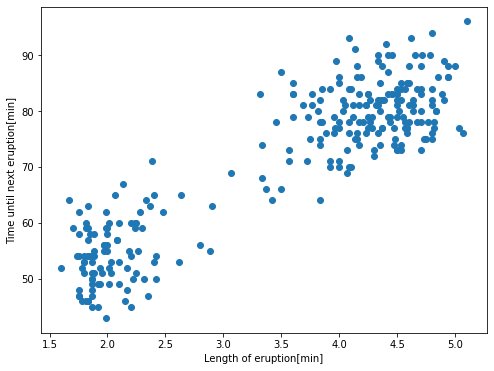

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.scatter(X, Y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)

plt.xlabel('Length of eruption[min]')
plt.ylabel('Time until next eruption[min]')
plt.axis('tight')
plt.show()

**d)** Looking at the plot, what can you observe?

There seems to be a linear relationship between the waiting time and duration of an eruption. As the waiting time increases, the duration of the eruption increases.

## Assignment 2: The Iris Dataset [10 Points]

The Iris Dataset is another Machine Learning Toy Dataset. The goal is to *classify* the iris plant into three sub-species or *classes* displayed below: I. setosa, I. versicolor, and I. virginica. For that four *features*, the length and width of both the petal and sepal leaves are provided. More information is found [here](https://archive.ics.uci.edu/ml/datasets/Iris/). This type of problem is a *Classification* task in which a mapping from *features* to *label* or *class* has to be learned usind *training samples*. For new *samples* of unknown class, the class has to be *predicted* from the features.

![iris1](iris1.jpg) ![iris2](iris2.jpg) ![iris3](iris3.jpg) 

In this case data is provided in the file `iris.json` in the [json data interchange format](https://en.wikipedia.org/wiki/JSON). 

**a)** Open the `iris.json` file (from the Stud.IP exercise folder) with a standard text editor and briefly describe the structure and the content of the file.

The data set contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) and 50 instances each.
- Prediction: Class of iris plant
- Attributes:
    - sepal length (cm)
    - sepal width (cm)
    - petal length (cm)
    - petal width (cm)

We now load the Python module [json](https://docs.python.org/3/library/json.html) to import the iris data into python and work with it:

In [1]:
import json

We need also the [numpy](https://numpy.org/) module for computing and array manipulation:

In [2]:
import numpy as np

We can now load the dataset into python:

In [3]:
# load file
with open('iris.json') as iris_file:
    iris = json.load(iris_file)

And print some basic information of the dataset:

In [4]:
print('Datatype:', type(iris))
print('Keys:', iris.keys())
print('Attributes:', iris.get('attributes'))
print('Labels:', iris.get('target_names'))
print('Number of samples:', len(iris.get('targets')))

Datatype: <class 'dict'>
Keys: dict_keys(['attributes', 'data', 'target_names', 'targets'])
Attributes: ['sepal length', 'sepal width', 'petal length', 'petal width']
Labels: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Number of samples: 150


**b)** Explain each of the above printed lines and what they tell you about the dataset

1. The data is stored in a dictionary data structure with keys and values
2. List of keys in the dictionary
3. List of values stored under the key 'attributes' in the dictionary
4. List of values stored under the key 'target_names' in the dictionary
5. Sample size: Length of the list of values stored under the key 'targets'

We can also print information of a single *sample* of the dataset:

In [5]:
# Cast data to correct data type and convert to numpy array
X = np.array(iris.get('data')).astype(np.float)
Y = np.array(iris.get('targets')).astype(np.int)
example_num = 42

# YOUR CODE HERE
num = 7
print("data:", X[num])
print("target:", Y[num])

print()
print('Example data:', X[example_num])
print('Example target:', Y[example_num])

data: [5.  3.4 1.5 0.2]
target: 0

Example data: [4.4 3.2 1.3 0.2]
Example target: 0


**c)** Print another example. Think about the function of the first two lines in the code above and discuss with your tutors.

To get more insight into our dataset we could print more samples but visualisation is the better solution. For that we use the [matplotlib](https://matplotlib.org/) module:

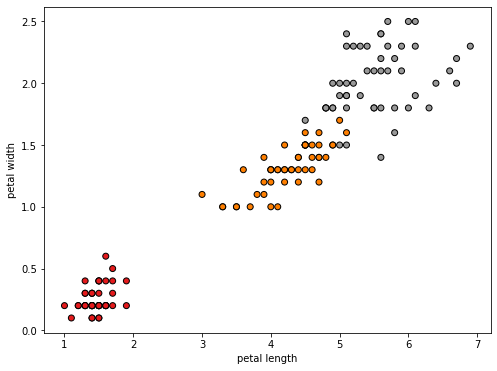

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# create a new figure (figsize --> width, height in inches)
plt.figure(figsize=(8, 6))

# using the attributes petal length and petal width
attr_num1 = 2
attr_num2 = 3

# YOUR CODE HERE
# attr_num1 = 0
# attr_num2 = 1

# - X is a list of instances where each instance is a list of 4 values (the attributes)
# - rows are actually the instances and columns are the i-th attribute of all instances where 1 \in [0, 3]
# - X[:, attr_num1] selects the attr_num1'th col in the 2D matrix
# - the minimum value from this col is selected and decreased by .5
# - we're setting the minimum x value of our coordinate system to this value
# - analogous for each case

# the variables are never used
x_min, x_max = X[:, attr_num1].min() - .5, X[:, attr_num1].max() + .5
y_min, y_max = X[:, attr_num2].min() - .5, X[:, attr_num2].max() + .5

# X and Y: the data positions
# c: the colors (here the targets (0, 1, 2))
# cmap: color map
# edgecolor: edge color of the marker
plt.scatter(X[:,attr_num1], X[:,attr_num2], c=Y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel(iris.get('attributes')[attr_num1])
plt.ylabel(iris.get('attributes')[attr_num2])
plt.show()

**d)** Explain what the code above does and what is plotted in the graph. Then use another feature combination.

For code explanation, see comments.

The petal length and petal width data for the three classes from the training data is plotted.
The three colors discriminate the three classes.

If we want to plot all possible feature combinations, we can use functions of the [seaborn](https://seaborn.pydata.org) module, which again is based on the [pandas](https://pandas.pydata.org/) module:

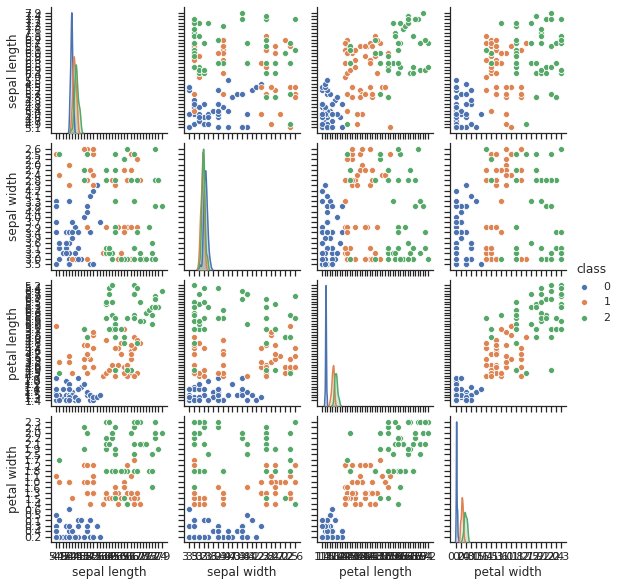

In [7]:
import pandas as pd
import seaborn as sns

sns.set(style="ticks")
# create pandas data frame from features

df = pd.DataFrame(iris.get('data'), columns=iris.get('attributes'))
# add the classes
df['class'] = iris.get('targets')

sns.pairplot(df, hue="class", height=2)

**e)** What is displayed in the graphs above?

All possible feature combinations.

**Bonus)** We can also use Principal Component Analysis to visualize the data. For that we use [scikit-learn](https://scikit-learn.org/stable/index.html). Explain what the code below does.

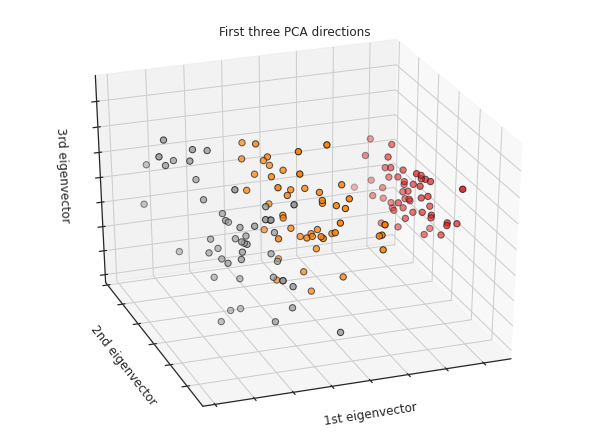

In [10]:
# PCA to visualize data completely
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# create new figure (width 8, height 6)
fig = plt.figure(figsize=(8, 6))

# 3D axes object
# elev: Elevation viewing angle
# azim: Azimuthal viewing angle
ax = Axes3D(fig, elev=-150, azim=110)

# Principal component analysis (PCA).
# fit_transform(X) --> Fit the model with X and apply the dimensionality reduction on X.
X_reduced = PCA(n_components=3).fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

YOUR ANSWER HERE

## Bottom Line
If you want to do more take a look at the [scikit-learn](https://scikit-learn.org/stable/tutorial/index.html) or the [seaborn](https://seaborn.pydata.org/tutorial.html) tutorial. You can try to load and visualize another dataset or have a closer look at [numpy](https://numpy.org/devdocs/user/quickstart.html) and [matplotlib](https://matplotlib.org/3.1.3/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).